# Критерии согласия

В Python, как и в любых других статистических пакетах, уже реализованы многие критерии, которые мы изучали. Давайте посмотрим, как применять эти критерии на практике.

In [1]:
# как обычно, начнем с импорта нужных библиотек
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
# и зафиксируем seed
np.random.seed(123)

## Критерий Колмогорова

Начнем с критерия согласия Колмогорова. Этот критерий проверяет простую гипотезу о принадлежности выборки некоторому (непрерывному!) закону распределения. Критерий Колмогорова реализован с помощью функции kstest в модуле stats:

* **stats.kstest(sample, cdf)** — тут sample — реализация нашей выборки и cdf — функция распределения закона, с которым сравниваем.

In [24]:
n = 500 # размер выборки

In [25]:
sample1 = np.random.rand(n) # выборка 1 из равномерного распределения на [0,1]
sample2 = np.random.beta(2,2,size = n) # выборка 2 из бета-распределения с параметрами (2,2)

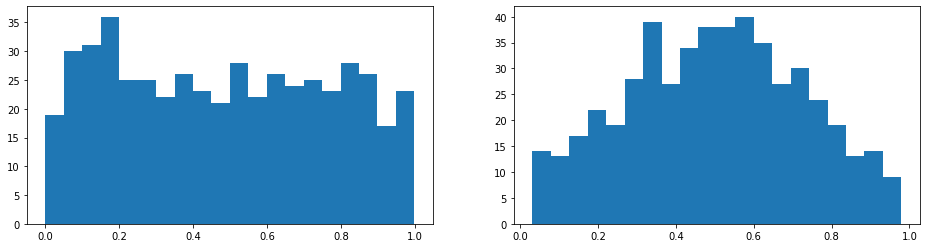

In [26]:
# давайте сначала посмотрим на гистограммы для sample1 и sample2

fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(16,4)) 

ax1.hist(sample1, bins=20)
ax2.hist(sample2, bins=20)

plt.show()

In [6]:
# Запускаем критерий Колмогорова для sample1, 
# проверяем гипотезу о том, что выборка взята из равномерного распределения на [0,1].
# Должны получить большой p-value (что будет означать, что значение статистики попало в область вероятных значений).

stats.kstest(sample1, stats.uniform.cdf)

KstestResult(statistic=0.02977893867201975, pvalue=0.7670247122317305)

In [7]:
# Запускаем критерий Колмогорова для sample2, 
# проверяем гипотезу о том, что выборка взята из равномерного распределения на [0,1].
# Должны получить малый p-value (что будет означать, что значение статистики попало в область маловероятных значений).

stats.kstest(sample2, stats.uniform.cdf)

KstestResult(statistic=0.109059197161369, pvalue=1.2372423114520465e-05)

In [8]:
# Запускаем критерий Колмогорова для sample1, 
# проверяем гипотезу о том, что выборка взята из бета-распределения с параметрами (2,2).
# Обратите внимание на то, как передавать параметры для функции плотности.

stats.kstest(sample1, stats.beta.cdf, args=(2,2))

KstestResult(statistic=0.09860184733194155, pvalue=0.00011034826529907896)

In [9]:
# Запускаем критерий Колмогорова для sample2, 
# проверяем гипотезу о том, что выборка взята из бета-распределения с параметрами (2,2).

stats.kstest(sample2, stats.beta.cdf, args=(2,2))

KstestResult(statistic=0.023712619065139495, pvalue=0.9412673751712639)

## Критерий хи-квадрат

Теперь перейдем к критерию согласия хи-квадрат. Этот критерий реализован с помощью функции chisquare в модуле stats:
    
* **stats.chisquare(obs, exp)** — тут obs — количества попаданий в каждую "ячейку" и exp — ожидаемые количества попаданий в каждую "ячейку".

P.S. Обратите внимание на то, что мы передаем в функцию chisquare не вероятности (эмпирические и истинные), а количества!

В экспериментах с селекцией гороха Мендель наблюдал частоты различных видов семян, получаемых при скрещивании растений с круглыми желтыми семенами и растений с морщинистыми зелеными семенами. Эти данные и значения теоретических вероятностей, определяемые в соответствии с законом Менделя, приведены в следующей таблице:

| Тип семян            | Частота | Вероятность |
|:-------------------- |:-------:| -----------:|
| Круглые и желтые     | 315/556 | 9/16        |
| Морщинистые и желтые | 101/556 | 3/16        |
| Круглые и зеленые    | 108/556 | 3/16        |
| Морщинистые и зеленые| 32/556  | 1/16        |

Необходимо проверить гипотезу $H_0$ о согласованности частот с теоретическими вероятностями при помощи критерия хи-квадрат.

In [10]:
# занесем данные из таблицы в массивы

obs = np.array([315/556, 101/556, 108/556, 32/556])
exp = np.array([9/16, 3/16, 3/16, 1/16])

In [11]:
# вспомним о том, что в функцию chisquare мы должны передавать количества, а не частоты

obs = obs*556
exp = exp*556

In [12]:
# запускаем критерий хи-квадрат

stats.chisquare(obs, exp)

Power_divergenceResult(statistic=0.4700239808153487, pvalue=0.9254258951036157)

## Проверка нормальности

Очень важная группа критериев согласия — это критерии для проверки нормальности. На лекции мы изучали следующие методы: 

* **qqplot(sample, dist, line='r')** — квантильный график (Q-Q Plot) — визуальная проверка любого критерия согласия о масштабе/сдвиге. Аргументы: sample — наша выборка, dits — распределение, с которым сравниваем (если этот параметр не указан, то используется нормальное распределение), line='r' — подгоняет прямую под облако точек, чтобы было проще визуально сравнивать.
* **stats.shapiro(sample)** — критерий Шапиро-Уилка. Аргументы: sample — наша выборка.
* **stats.jarque_bera(sample)** — критерий Харке-Бера. Аргументы: sample — наша выборка.

In [13]:
# поменяем размер выборки, если нужно

n = 500

In [28]:
sample1 = np.random.normal(0,1, size=n) # выборка из нормального распределения
sample2 = np.random.beta(2,2,size = n) # выборка из бета-распределения с параметрами (2,2)

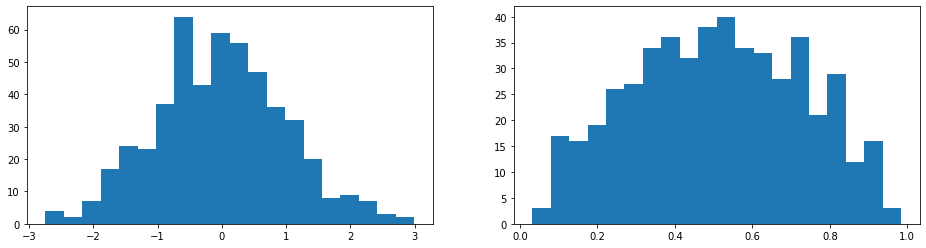

In [29]:
# нарисуем гистограммы 

fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(16,4)) 

ax1.hist(sample1, bins=20)
ax2.hist(sample2, bins=20)

plt.show()

In [16]:
from statsmodels.graphics.gofplots import qqplot # импортируем функцию qqplot

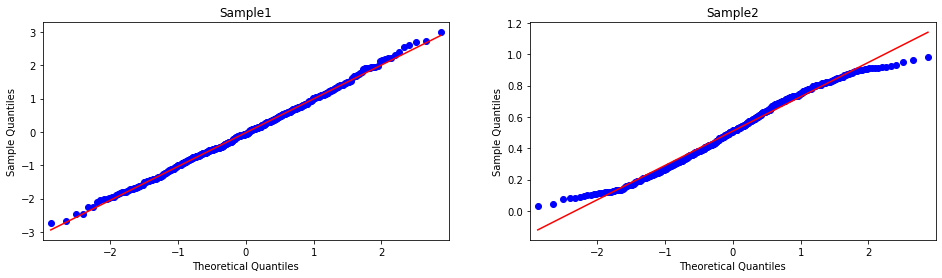

In [36]:
# давайте сначала посмотрим на гистограммы для sample1 и sample2

fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(16,4)) 

qqplot(sample1, line='r',ax=ax1)
ax1.set_title("Sample1")

qqplot(sample2, line='r',ax=ax2)
ax2.set_title("Sample2")

plt.show()

In [19]:
# запускаем критерий Шапиро-Уилка для sample1

stats.shapiro(sample1)

(0.9959385395050049, 0.2265857309103012)

In [20]:
# запускаем критерий Шапиро-Уилка для sample2

stats.shapiro(sample2)

(0.9849844574928284, 4.944821193930693e-05)

In [21]:
# запускаем критерий Харке-Бера для sample1

stats.jarque_bera(sample1)

(0.5047526531339085, 0.7769522952554369)

In [22]:
# запускаем критерий Харке-Бера для sample2

stats.jarque_bera(sample2)

(13.737779567593636, 0.001039630638919098)

## Вместо заключения

В статистике известно большое количество критериев согласия и далеко не все из них реализованы в Python. О критериях можно почитать в книге А.И. Кобзарь "Прикладная математическая статистика. Для инженеров и научных работников". (Почти) полный список того, что реализовано в Python можно найти в официальной документации в разделе Statistical tests: https://docs.scipy.org/doc/scipy/reference/stats.html#module-scipy.stats.

Если в официальной документации Вы не найдете нужного критерия, гуглите. Вполне возможно, что критерий, который Вам нужен, реализован.